# Mini Project: Tree-Based Algorithms

## The "German Credit" Dataset

### Dataset Details

This dataset has two classes (these would be considered labels in Machine Learning terms) to describe the worthiness of a personal loan: "Good" or "Bad". There are predictors related to attributes, such as: checking account status, duration, credit history, purpose of the loan, amount of the loan, savings accounts or bonds, employment duration, installment rate in percentage of disposable income, personal information, other debtors/guarantors, residence duration, property, age, other installment plans, housing, number of existing credits, job information, number of people being liable to provide maintenance for, telephone, and foreign worker status.

Many of these predictors are discrete and have been expanded into several 0/1 indicator variables (a.k.a. they have been one-hot-encoded).

This dataset has been kindly provided by Professor Dr. Hans Hofmann of the University of Hamburg, and can also be found on the UCI Machine Learning Repository.

## Decision Trees

 As we have learned in the previous lectures, Decision Trees as a family of algorithms (irrespective to the particular implementation) are powerful algorithms that can produce models with a predictive accuracy higher than that produced by linear models, such as Linear or Logistic Regression. Primarily, this is due to the fact the DT's can model nonlinear relationships, and also have a number of tuning paramters, that allow for the practicioner to achieve the best possible model. An added bonus is the ability to visualize the trained Decision Tree model, which allows for some insight into how the model has produced the predictions that it has. One caveat here, to keep in mind, is that sometimes, due to the size of the dataset (both in the sense of the number of records, as well as the number of features), the visualization might prove to be very large and complex, increasing the difficulty of interpretation.

To give you a very good example of how Decision Trees can be visualized and interpreted, we would strongly recommend that, before continuing on with solving the problems in this Mini Project, you take the time to read this fanstastic, detailed and informative blog post: http://explained.ai/decision-tree-viz/index.html

## Building Your First Decision Tree Model

So, now it's time to jump straight into the heart of the matter. Your first task, is to build a Decision Tree model, using the aforementioned "German Credit" dataset, which contains 1,000 records, and 62 columns (one of them presents the labels, and the other 61 present the potential features for the model.)

For this task, you will be using the scikit-learn library, which comes already pre-installed with the Anaconda Python distribution. In case you're not using that, you can easily install it using pip.

Before embarking on creating your first model, we would strongly encourage you to read the short tutorial for Decision Trees in scikit-learn verbose=/scikit-learn.org/stable/modules/tree.html), and then dive a bit deeper into the documentation of the algorithm itself (http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). 

Also, since you want to be able to present the results of your model, we suggest you take a look at the tutorial for accuracy metrics for classification models (http://scikit-learn.org/stable/modules/model_evaluation.html#classification-report) as well as the more detailed documentation (http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html).

Finally, an *amazing* resource that explains the various classification model accuracy metrics, as well as the relationships between them, can be found on Wikipedia: https://en.wikipedia.org/wiki/Confusion_matrix

(Note: as you've already learned in the Logistic Regression mini project, a standard practice in Machine Learning for achieving the best possible result when training a model is to use hyperparameter tuning, through Grid Search and k-fold Cross Validation. We strongly encourage you to use it here as well, not just because it's standard practice, but also becuase it's not going to be computationally to intensive, due to the size of the dataset that you're working with. Our suggestion here is that you split the data into 70% training, and 30% testing. Then, do the hyperparameter tuning and Cross Validation on the training set, and afterwards to a final test on the testing set.)

### Now we pass the torch onto you! You can start building your first Decision Tree model! :)

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Your code here! :)
df = pd.read_csv("GermanCredit.csv")
df.head()

,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,Class,...,OtherInstallmentPlans.Bank,OtherInstallmentPlans.Stores,OtherInstallmentPlans.None,Housing.Rent,Housing.Own,Housing.ForFree,Job.UnemployedUnskilled,Job.UnskilledResident,Job.SkilledEmployee,Job.Management.SelfEmp.HighlyQualified
0,6,1169,4,4,67,2,1,0,1,Good,...,0,0,1,0,1,0,0,0,1,0
1,48,5951,2,2,22,1,1,1,1,Bad,...,0,0,1,0,1,0,0,0,1,0
2,12,2096,2,3,49,1,2,1,1,Good,...,0,0,1,0,1,0,0,1,0,0
3,42,7882,2,4,45,1,2,1,1,Good,...,0,0,1,0,0,1,0,0,1,0
4,24,4870,3,4,53,2,2,1,1,Bad,...,0,0,1,0,0,1,0,0,1,0


In [3]:
# Drop Class to get the array of dimensions/features
features = df.columns
features = features.drop("Class")
features

Index(['Duration', 'Amount', 'InstallmentRatePercentage', 'ResidenceDuration',
       'Age', 'NumberExistingCredits', 'NumberPeopleMaintenance', 'Telephone',
       'ForeignWorker', 'CheckingAccountStatus.lt.0',
       'CheckingAccountStatus.0.to.200', 'CheckingAccountStatus.gt.200',
       'CheckingAccountStatus.none', 'CreditHistory.NoCredit.AllPaid',
       'CreditHistory.ThisBank.AllPaid', 'CreditHistory.PaidDuly',
       'CreditHistory.Delay', 'CreditHistory.Critical', 'Purpose.NewCar',
       'Purpose.UsedCar', 'Purpose.Furniture.Equipment',
       'Purpose.Radio.Television', 'Purpose.DomesticAppliance',
       'Purpose.Repairs', 'Purpose.Education', 'Purpose.Vacation',
       'Purpose.Retraining', 'Purpose.Business', 'Purpose.Other',
       'SavingsAccountBonds.lt.100', 'SavingsAccountBonds.100.to.500',
       'SavingsAccountBonds.500.to.1000', 'SavingsAccountBonds.gt.1000',
       'SavingsAccountBonds.Unknown', 'EmploymentDuration.lt.1',
       'EmploymentDuration.1.to.4', 'Emp

In [4]:
# Split the data as observations (X) and labels (Y)
X = df[features]
Y = df["Class"]
print(X.head())
print (Y.head())

   Duration  Amount  InstallmentRatePercentage  ResidenceDuration  Age  \
0         6    1169                          4                  4   67   
1        48    5951                          2                  2   22   
2        12    2096                          2                  3   49   
3        42    7882                          2                  4   45   
4        24    4870                          3                  4   53   

   NumberExistingCredits  NumberPeopleMaintenance  Telephone  ForeignWorker  \
0                      2                        1          0              1   
1                      1                        1          1              1   
2                      1                        2          1              1   
3                      1                        2          1              1   
4                      2                        2          1              1   

   CheckingAccountStatus.lt.0  ...  OtherInstallmentPlans.Bank  \
0             

In [5]:
#Check if the data is balance. Data is imbalanced. **Maybe an issue ***
Y.value_counts()

Good    700
Bad     300
Name: Class, dtype: int64

<b style="color:red;">Shiby Question: </b>Should the data imbalance be treated?

In [6]:
"""
Check the quality of observation
   1) Check if all data is numeric. Confirmed that this is the case and hence no transformation of Categorical data is needed.
   2) The ratio of number of samples to dimension is >10 which is good.
"""
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 61 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   Duration                                1000 non-null   int64
 1   Amount                                  1000 non-null   int64
 2   InstallmentRatePercentage               1000 non-null   int64
 3   ResidenceDuration                       1000 non-null   int64
 4   Age                                     1000 non-null   int64
 5   NumberExistingCredits                   1000 non-null   int64
 6   NumberPeopleMaintenance                 1000 non-null   int64
 7   Telephone                               1000 non-null   int64
 8   ForeignWorker                           1000 non-null   int64
 9   CheckingAccountStatus.lt.0              1000 non-null   int64
 10  CheckingAccountStatus.0.to.200          1000 non-null   int64
 11  CheckingAccountSta

In [7]:
# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.3, random_state=42)

In [8]:
#Setup Hyperparmeters for tuning
params = {"criterion": ["gini", "entropy"], "splitter": ["best", "random"],  "max_depth":np.arange(3,10,1), "min_samples_split": np.arange(0.008,0.015,0.001)
           , "min_samples_leaf": np.arange(5,10,1), "max_features": ["auto", "sqrt", "log2", None]
         }
params

{'criterion': ['gini', 'entropy'],
 'splitter': ['best', 'random'],
 'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
 'min_samples_split': array([0.008, 0.009, 0.01 , 0.011, 0.012, 0.013, 0.014]),
 'min_samples_leaf': array([5, 6, 7, 8, 9]),
 'max_features': ['auto', 'sqrt', 'log2', None]}

In [9]:
%%time
g_dtc = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid=params, cv=10)
g_dtc.fit(X_train, y_train)

CPU times: user 3min 49s, sys: 735 ms, total: 3min 50s
Wall time: 3min 50s


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_leaf': array([5, 6, 7, 8, 9]),
                         'min_samples_split': array([0.008, 0.009, 0.01 , 0.011, 0.012, 0.013, 0.014]),
                         'splitter': ['best', 'random']})

In [10]:
print("Best score: {} and params {}".format(g_dtc.best_score_, g_dtc.best_params_))
g_dtc_best = g_dtc.best_estimator_
y_pred = g_dtc_best.predict(X_test)
print(classification_report(y_test, y_pred))

Best score: 0.7514285714285714 and params {'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 6, 'min_samples_split': 0.008, 'splitter': 'best'}
              precision    recall  f1-score   support

         Bad       0.59      0.22      0.32        91
        Good       0.73      0.93      0.82       209

    accuracy                           0.72       300
   macro avg       0.66      0.58      0.57       300
weighted avg       0.69      0.72      0.67       300



[Text(1116.0, 733.86, 'Property.RealEstate <= 0.5\ngini = 0.419\nsamples = 100.0%\nvalue = [0.299, 0.701]\nclass = Bad'),
 Text(558.0, 570.78, 'CheckingAccountStatus.lt.0 <= 0.5\ngini = 0.447\nsamples = 71.9%\nvalue = [0.338, 0.662]\nclass = Bad'),
 Text(279.0, 407.70000000000005, 'Purpose.UsedCar <= 0.5\ngini = 0.387\nsamples = 52.3%\nvalue = [0.262, 0.738]\nclass = Bad'),
 Text(139.5, 244.62, 'Amount <= 7829.0\ngini = 0.408\nsamples = 45.6%\nvalue = [0.285, 0.715]\nclass = Bad'),
 Text(69.75, 81.54000000000008, 'gini = 0.369\nsamples = 40.4%\nvalue = [0.244, 0.756]\nclass = Bad'),
 Text(209.25, 81.54000000000008, 'gini = 0.475\nsamples = 5.1%\nvalue = [0.611, 0.389]\nclass = Good'),
 Text(418.5, 244.62, 'Personal.Male.Single <= 0.5\ngini = 0.19\nsamples = 6.7%\nvalue = [0.106, 0.894]\nclass = Bad'),
 Text(348.75, 81.54000000000008, 'gini = 0.444\nsamples = 2.1%\nvalue = [0.333, 0.667]\nclass = Bad'),
 Text(488.25, 81.54000000000008, 'gini = 0.0\nsamples = 4.6%\nvalue = [0.0, 1.0]\ncl

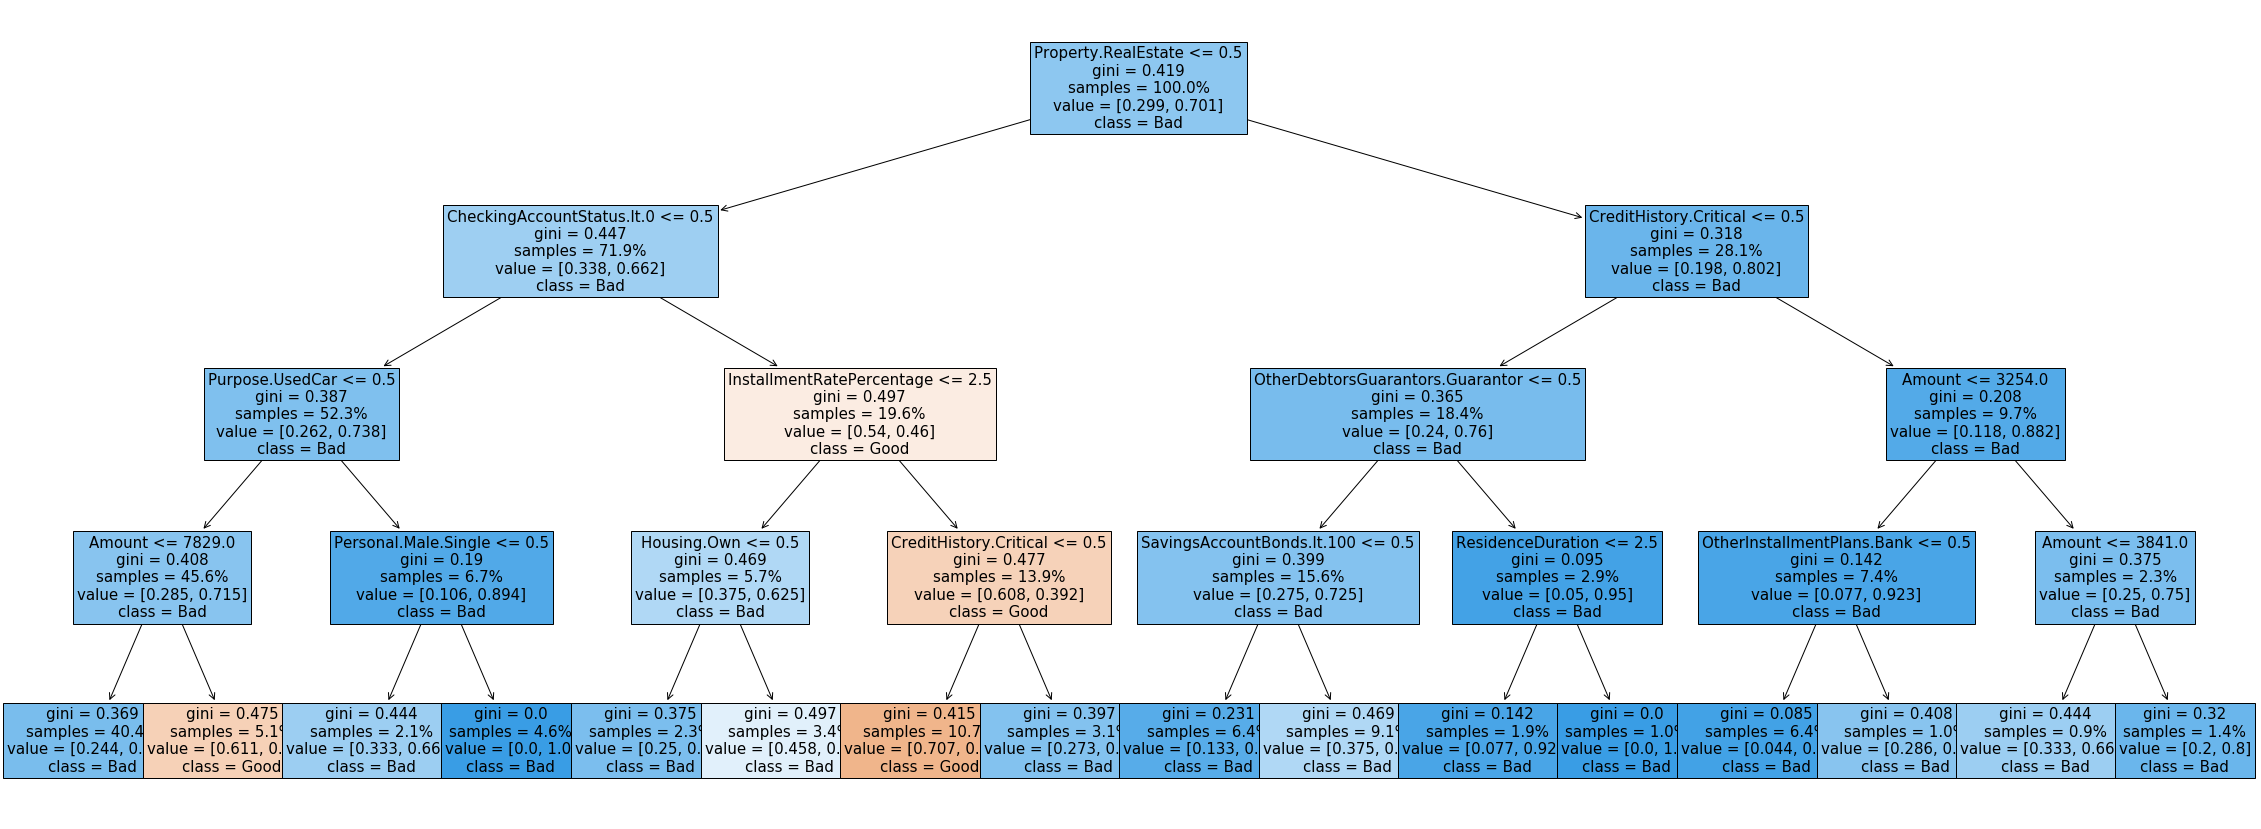

In [11]:
import sklearn.tree as sktree
plt.figure(figsize=(40,15))
sktree.plot_tree(g_dtc_best, feature_names=X.columns, class_names=Y.value_counts().index.values, proportion=True, filled=True, fontsize=15)

In [12]:
g_dtc_best.decision_path(X_test)

<300x31 sparse matrix of type '<class 'numpy.int64'>'
	with 1500 stored elements in Compressed Sparse Row format>

### After you've built the best model you can, now it's time to visualize it!

Rememeber that amazing blog post from a few paragraphs ago, that demonstrated how to visualize and interpret the results of your Decision Tree model. We've seen that this can perform very well, but let's see how it does on the "German Credit" dataset that we're working on, due to it being a bit larger than the one used by the blog authors.

First, we're going to need to install their package. If you're using Anaconda, this can be done easily by running:

In [13]:
! pip install dtreeviz

If for any reason this way of installing doesn't work for you straight out of the box, please refer to the more detailed documentation here: https://github.com/parrt/dtreeviz

Now you're ready to visualize your Decision Tree model! Please feel free to use the blog post for guidance and inspiration!

In [14]:
# Your code here! :)
import graphviz
from dtreeviz.models.shadow_decision_tree import ShadowDecTree
from dtreeviz.models.sklearn_decision_trees import ShadowSKDTree
from dtreeviz import trees

In [36]:
y_train_labelEncoded = y_train.apply(lambda x: 1 if x == 'Good' else 0)
print(y_train_labelEncoded)
y_test_labelEncoded = y_test.apply(lambda x: 1 if x == 'Good' else 0)

541    1
440    1
482    1
422    1
778    1
      ..
106    0
270    1
860    1
435    0
102    1
Name: Class, Length: 700, dtype: int64


In [22]:
params2={'criterion': ['gini'], 'max_depth': [4], 'max_features': ['auto'], 'min_samples_leaf': [6], 'min_samples_split': [0.008], 'splitter': ['best']}

In [40]:
%%time
g_dtc2 = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid=params2, cv=10)
g_dtc2.fit(X_train, y_train_labelEncoded)


CPU times: user 68 ms, sys: 0 ns, total: 68 ms
Wall time: 66.5 ms


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini'], 'max_depth': [4],
                         'max_features': ['auto'], 'min_samples_leaf': [6],
                         'min_samples_split': [0.008], 'splitter': ['best']})

In [63]:
y_pred_train = g_dtc2.best_estimator_.predict(X_train)
print(r"Training score %f, Testing score %f" % (g_dtc2.best_estimator_.score(X_train, y_train_labelEncoded)
              , g_dtc2.best_estimator_.score(X_test, y_test_labelEncoded)) )


Training score 0.757143, Testing score 0.716667


/opt/conda/envs/springboard/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


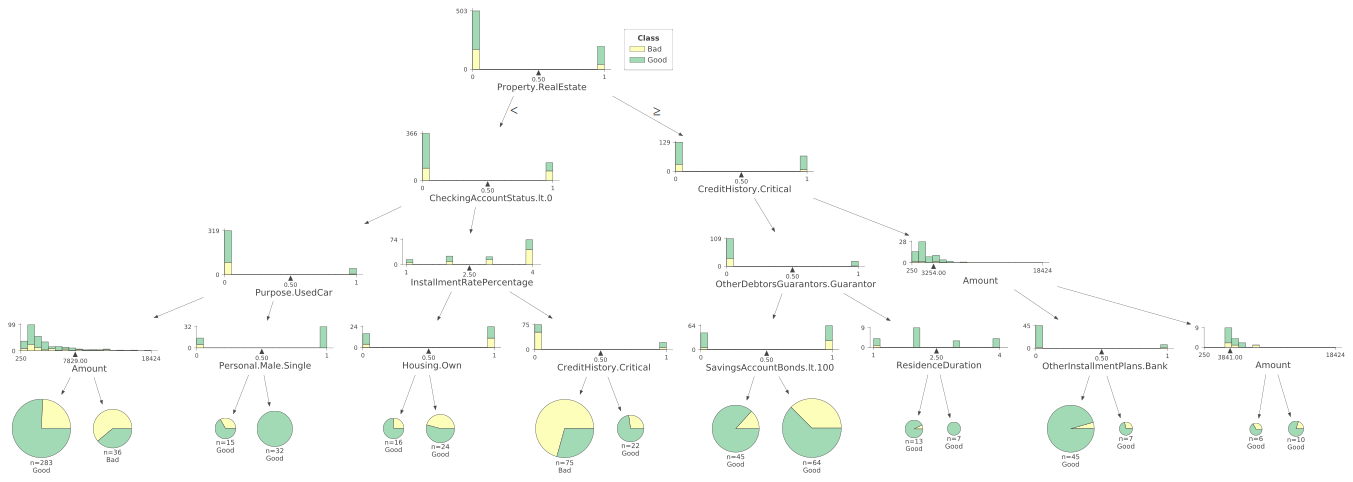

In [26]:
#View of decision tree
# *** IMPORTANT graphviz installed https://graphviz.org/download/
# *** IMPORTANT target predicted values have to be numeric for this graph to work
from dtreeviz.trees import *
viz = dtreeviz(g_dtc2.best_estimator_, 
               X_train, 
               y_train_labelEncoded,
               target_name='Class',
               feature_names=X_train.columns, 
               class_names=["Bad", "Good"]  # need class_names for classifier
              ) 
viz

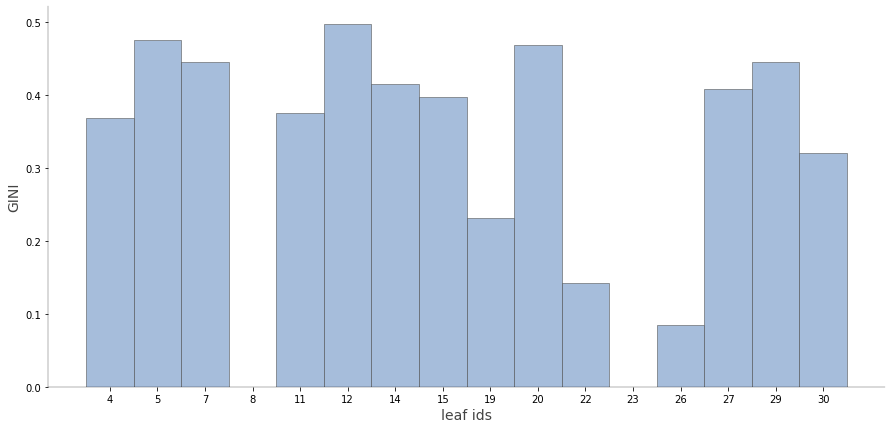

In [34]:
# Gini purity for each leaf
trees.viz_leaf_criterion(g_dtc2.best_estimator_, figsize=(15, 7))

<b style="color: red;">Shiby Question:</b>Is my assumption correct that based on the high Gini impurities at the leaf there is serious underfitting. The accuracy score also kinda reflects this. 

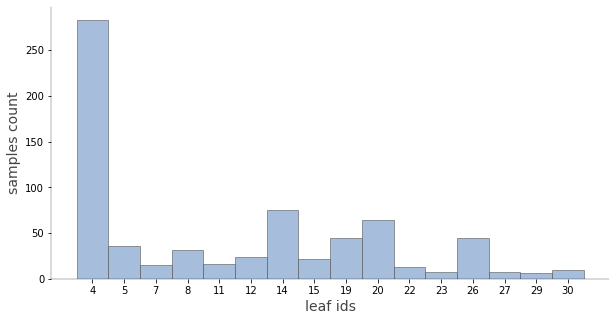

In [32]:
#Distribution of observations across the different leafs
trees.viz_leaf_samples(g_dtc2.best_estimator_, X_train, X.columns)

<b> Shiby's response</b>: Node 26 has low gini impurity which is good,  but the sample size is relatively low. Which could indicate overfitting. On the other hand Node 4 has a high sample count but also high impurity closer to 0.4 (max is 0.4) and hence is not very decisive.

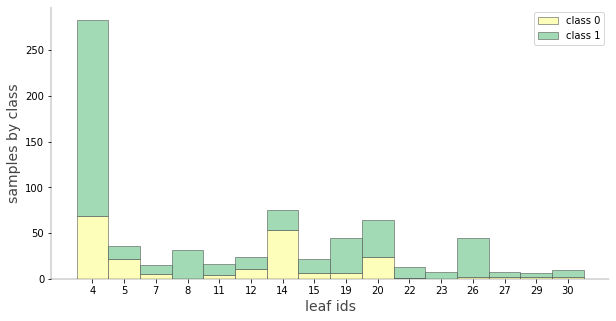

In [30]:
trees.ctreeviz_leaf_samples(g_dtc2.best_estimator_, x_data=X_train, y_data=y_train_labelEncoded, feature_names=X.columns)

The leaf node > 22 are very decisive by the sample volume is relatively low which is not good and nodes 4,14,20 are not decisive enough as impurity is high. Maybe due to the imbalance in dataset.

In [69]:
# get all samples from a specific node and make some stats on them
sk_dtree = ShadowSKDTree(g_dtc2.best_estimator_, X_train, y_train_labelEncoded, X_train.columns, "Class", ["Bad", "Good"])
trees.describe_node_sample(sk_dtree, node_id=4)


,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,CheckingAccountStatus.lt.0,...,OtherInstallmentPlans.Bank,OtherInstallmentPlans.Stores,OtherInstallmentPlans.None,Housing.Rent,Housing.Own,Housing.ForFree,Job.UnemployedUnskilled,Job.UnskilledResident,Job.SkilledEmployee,Job.Management.SelfEmp.HighlyQualified
count,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.0,...,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000
mean,19.989399,2798.618375,3.091873,2.872792,35.561837,1.424028,1.130742,0.554770,0.978799,0.0,...,0.148410,0.038869,0.812721,0.148410,0.731449,0.120141,0.014134,0.155477,0.681979,0.148410
std,10.522345,1789.217622,1.074546,1.087356,10.856195,0.568426,0.337715,0.497872,0.144310,0.0,...,0.356136,0.193626,0.390827,0.356136,0.443991,0.325703,0.118254,0.363001,0.466533,0.356136
min,6.000000,362.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,1440.500000,2.000000,2.000000,27.000000,1.000000,1.000000,0.000000,1.000000,0.0,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,18.000000,2278.000000,4.000000,3.000000,33.000000,1.000000,1.000000,1.000000,1.000000,0.0,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,24.000000,3617.000000,4.000000,4.000000,41.000000,2.000000,1.000000,1.000000,1.000000,0.0,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,60.000000,7678.000000,4.000000,4.000000,70.000000,4.000000,2.000000,1.000000,1.000000,0.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


/opt/conda/envs/springboard/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


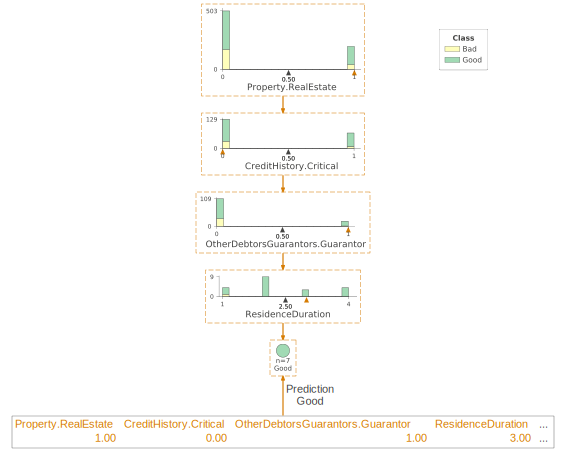

In [73]:
# showing a prediction path
trees.dtreeviz(sk_dtree, X=X_test.iloc[10], show_just_path=True)

In [75]:
# based on predicion path splitting values
print(trees.explain_prediction_path(sk_dtree, x=X_test.iloc[10], explanation_type="plain_english"))

2.5 <= ResidenceDuration 
CreditHistory.Critical < 0.5
0.5 <= OtherDebtorsGuarantors.Guarantor 
0.5 <= Property.RealEstate 



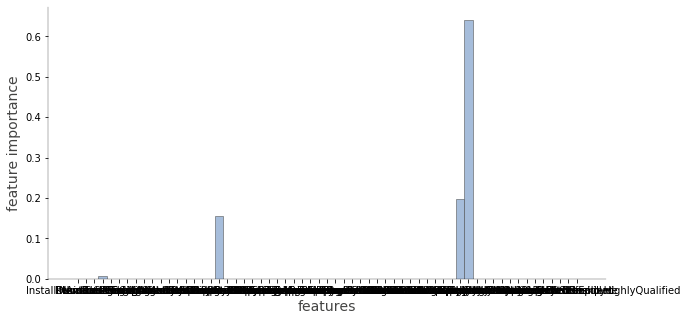

In [79]:
# features' importance based only on the predition path node
trees.explain_prediction_path(sk_dtree, x=X_test.iloc[10], explanation_type="sklearn_default")

## Random Forests

Noticing these problems, the late Professor Leo Breiman, in 2001, developed the Random Forests algorithm, which mitigates these problems, while at the same time providing even higher predictive accuracy than the majority of Decision Tree algorithm implementations. While the curriculum contains two excellent lectures on Random Forests, if you're interested, you can dive into the original paper here: https://link.springer.com/content/pdf/10.1023%2FA%3A1010933404324.pdf.

In the next part of this assignment, your are going to use the same "German Credit" dataset to train, tune, and measure the performance of a Random Forests model. You will also see certain functionalities that this model, even though it's a bit of a "black box", provides for some degree of interpretability.

First, let's build a Random Forests model, using the same best practices that you've used for your Decision Trees model. You can reuse the things you've already imported there, so no need to do any re-imports, new train/test splits, or loading up the data again.

In [122]:
from sklearn.ensemble import RandomForestClassifier

In [123]:
# Your code here! :)
params_rf = {"n_estimators":[100,150], "criterion":["gini", "entropy"], "max_depth": np.arange(3,8,1)
            , "min_samples_split": np.arange(0.008,0.015,0.001)
            , "max_features": ["auto", "sqrt", "log2", None]}
params_rf

{'n_estimators': [100, 150],
 'criterion': ['gini', 'entropy'],
 'max_depth': array([3, 4, 5, 6, 7]),
 'min_samples_split': array([0.008, 0.009, 0.01 , 0.011, 0.012, 0.013, 0.014]),
 'max_features': ['auto', 'sqrt', 'log2', None]}

In [124]:
%%time
gtrf_cv = GridSearchCV(RandomForestClassifier(random_state=42, n_jobs=4), param_grid=params_rf, cv=5)
gtrf_cv.fit(X_train, y_train)

CPU times: user 8min 53s, sys: 44.4 s, total: 9min 37s
Wall time: 12min 58s


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=4, random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([3, 4, 5, 6, 7]),
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_split': array([0.008, 0.009, 0.01 , 0.011, 0.012, 0.013, 0.014]),
                         'n_estimators': [100, 150]})

In [144]:
y_pred_rf = gtrf_cv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

         Bad       0.78      0.20      0.32        91
        Good       0.74      0.98      0.84       209

    accuracy                           0.74       300
   macro avg       0.76      0.59      0.58       300
weighted avg       0.75      0.74      0.68       300



As mentioned, there are certain ways to "peek" into a model created by the Random Forests algorithm. The first, and most popular one, is the Feature Importance calculation functionality. This allows the ML practitioner to see an ordering of the importance of the features that have contributed the most to the predictive accuracy of the model. 

You can see how to use this in the scikit-learn documentation (http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.feature_importances_). Now, if you tried this, you would just get an ordered table of not directly interpretable numeric values. Thus, it's much more useful to show the feature importance in a visual way. You can see an example of how that's done here: http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-py

Now you try! Let's visualize the importance of features from your Random Forests model!

In [199]:
# Your code here

def displayFeatureImportance (classifier):
    feature_importances = classifier.feature_importances_  # for forest
    std = np.std([tree.feature_importances_ for tree in classifier.estimators_], axis=0) # per tree
    indices = np.argsort(feature_importances)[::-1]

    # Print the feature ranking
    print("Feature ranking:")

    for f in range(X.shape[1]):
        print("%d. %s (%f)" % (f + 1, X.columns[indices[f]], feature_importances[indices[f]]))

    # Plot the impurity-based feature importances of the forest
    plt.figure(figsize=(40,40))
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), feature_importances[indices],
            color="r", yerr=std[indices], align="center")
    plt.xticks(range(X.shape[1]), indices)
    plt.xlabel("Feature Index", fontsize=20)
    
    plt.xlim([-1, X.shape[1]])
    plt.show()

Feature ranking:
1. Amount (0.106697)
2. Duration (0.085231)
3. Age (0.078406)
4. CheckingAccountStatus.none (0.074603)
5. CheckingAccountStatus.lt.0 (0.059864)
6. CreditHistory.Critical (0.044801)
7. InstallmentRatePercentage (0.024681)
8. Purpose.NewCar (0.022365)
9. CheckingAccountStatus.0.to.200 (0.020568)
10. ResidenceDuration (0.020201)
11. CreditHistory.NoCredit.AllPaid (0.019913)
12. Property.RealEstate (0.017724)
13. SavingsAccountBonds.lt.100 (0.016620)
14. Property.Unknown (0.016599)
15. CreditHistory.ThisBank.AllPaid (0.015527)
16. Housing.Own (0.015037)
17. Purpose.Radio.Television (0.014762)
18. EmploymentDuration.lt.1 (0.014211)
19. OtherInstallmentPlans.None (0.013564)
20. CreditHistory.PaidDuly (0.013321)
21. NumberExistingCredits (0.012658)
22. Telephone (0.012160)
23. SavingsAccountBonds.Unknown (0.011217)
24. EmploymentDuration.gt.7 (0.011059)
25. Purpose.Education (0.010971)
26. OtherInstallmentPlans.Bank (0.010884)
27. Personal.Male.Single (0.010826)
28. Housing.R

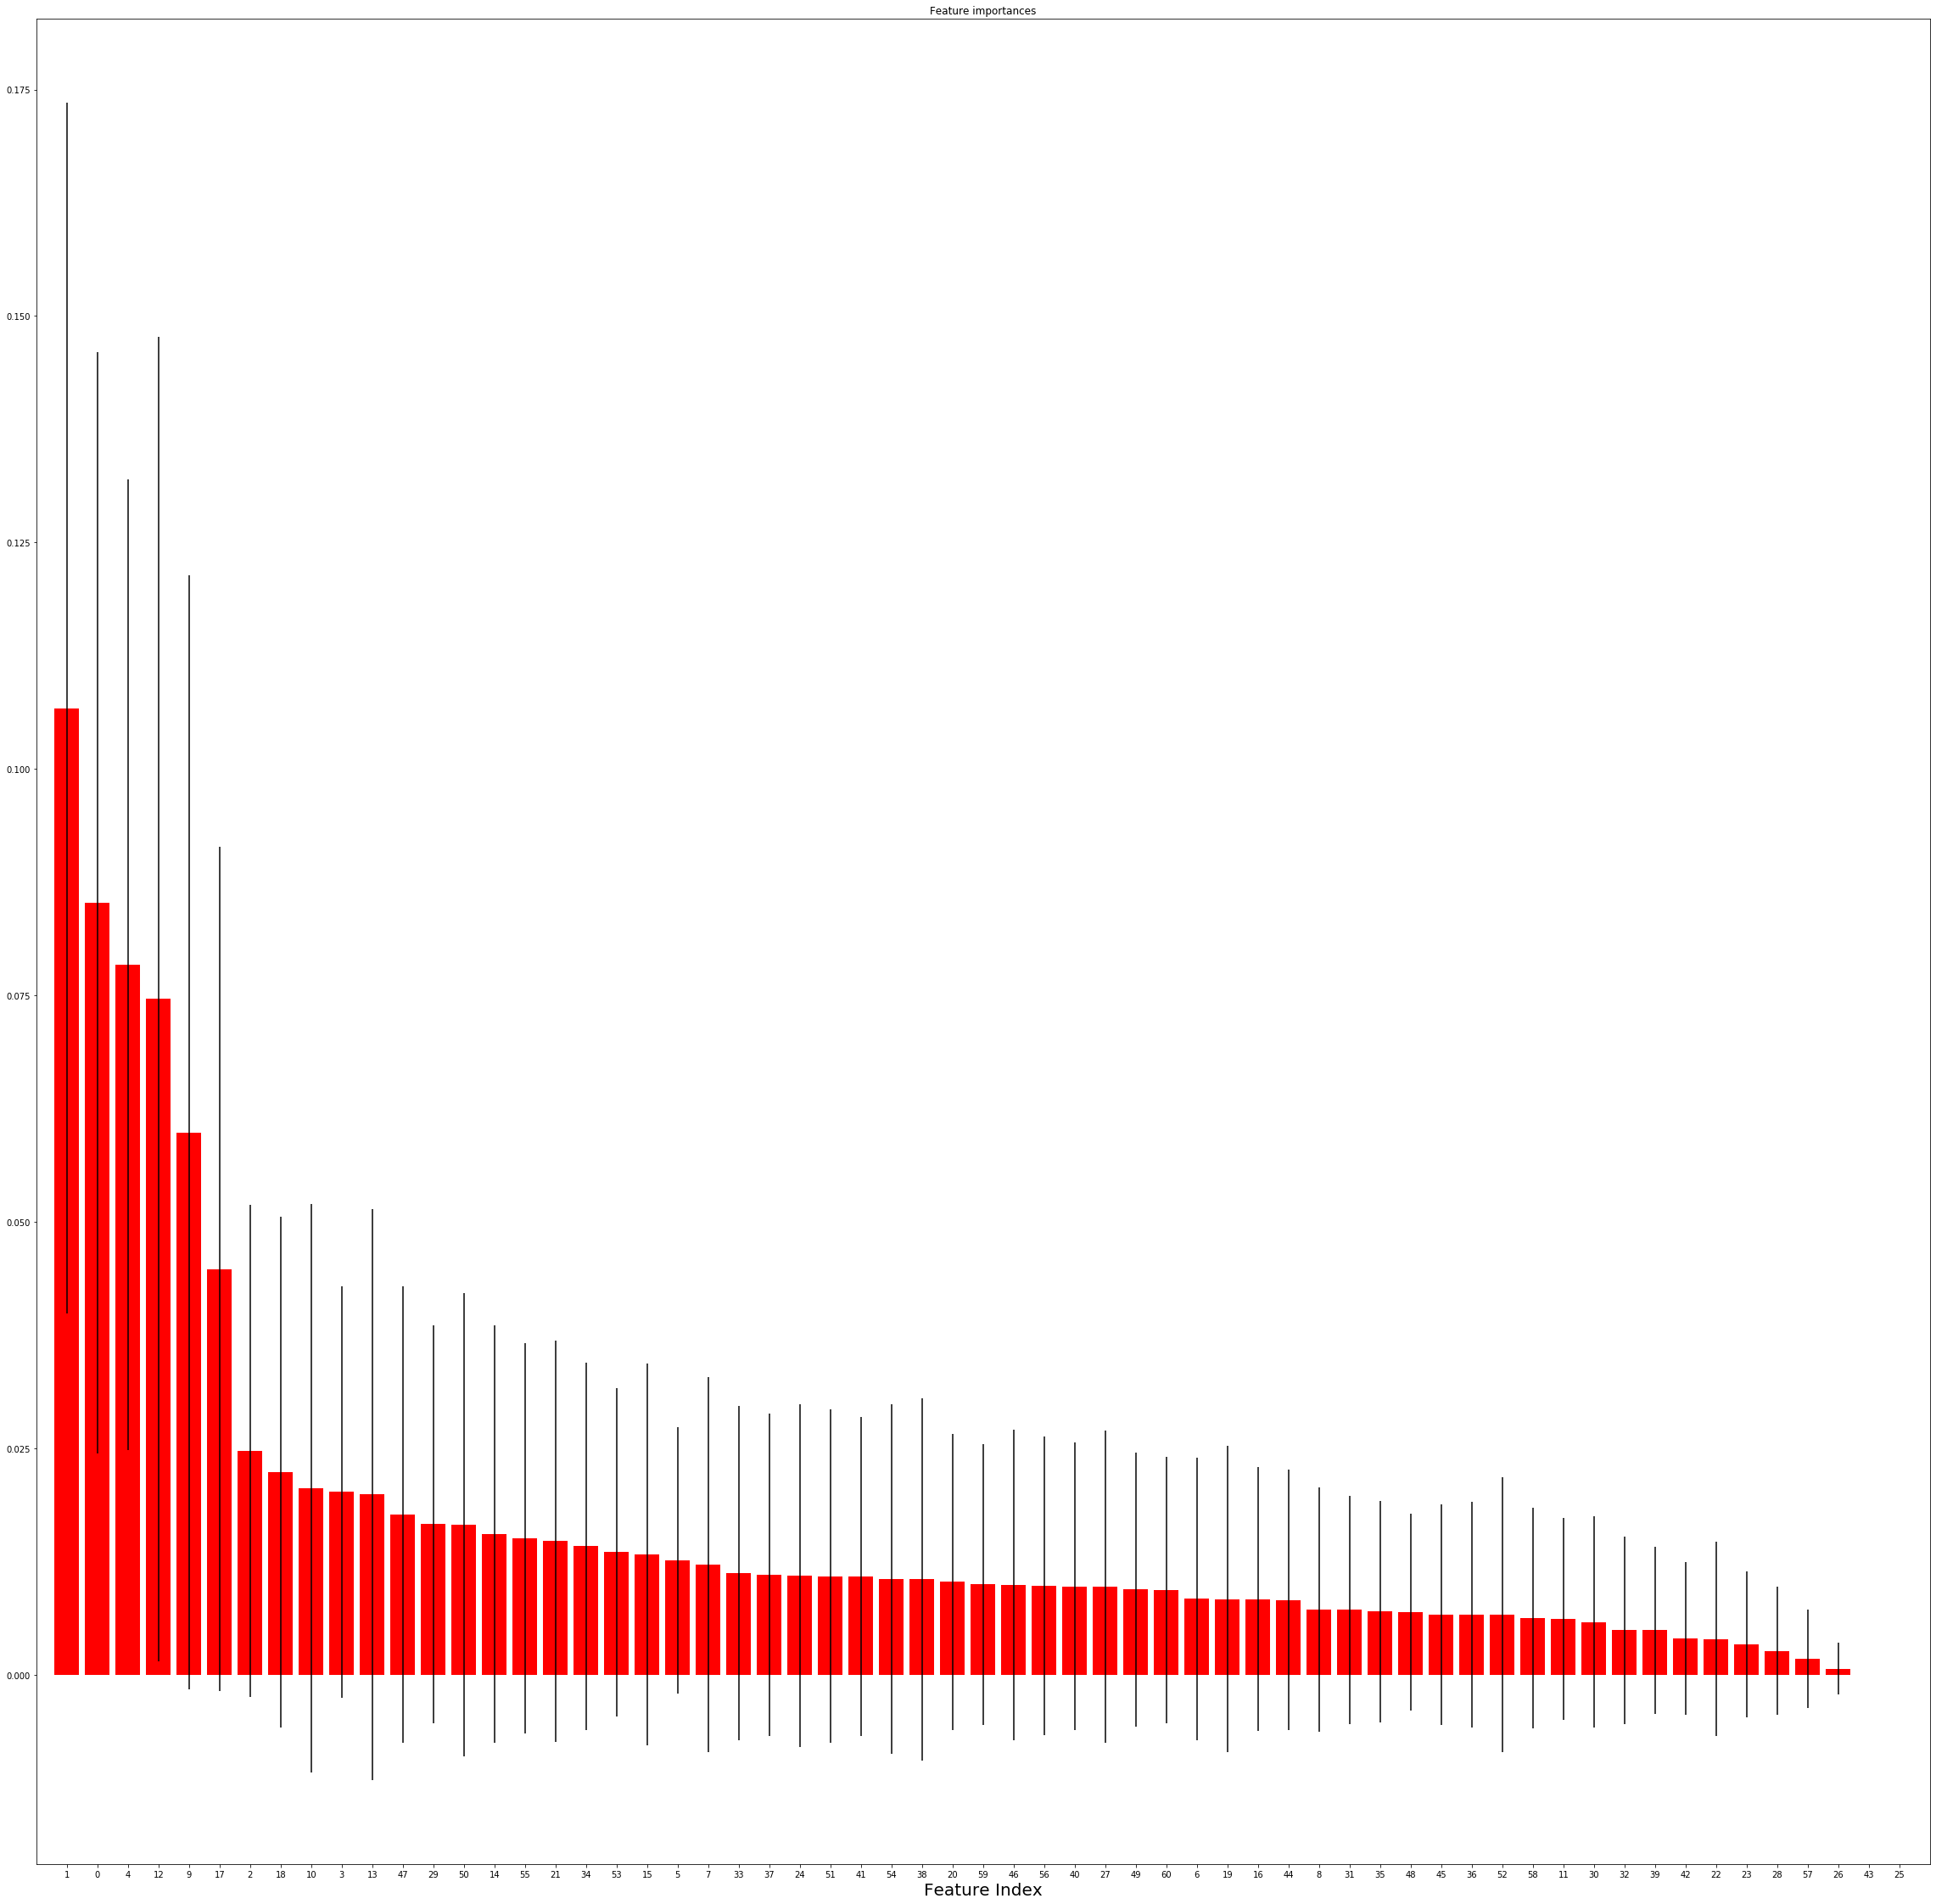

In [200]:
displayFeatureImportance(gtrf_cv.best_estimator_)


A final method for gaining some insight into the inner working of your Random Forests models is a so-called Partial Dependence Plot. The Partial Dependence Plot (PDP or PD plot) shows the marginal effect of a feature on the predicted outcome of a previously fit model. The prediction function is fixed at a few values of the chosen features and averaged over the other features. A partial dependence plot can show if the relationship between the target and a feature is linear, monotonic or more complex. 

In scikit-learn, PDPs are implemented and available for certain algorithms, but at this point (version 0.20.0) they are not yet implemented for Random Forests. Thankfully, there is an add-on package called **PDPbox** (https://pdpbox.readthedocs.io/en/latest/) which adds this functionality to Random Forests. The package is easy to install through pip.

In [201]:
! pip install pdpbox

     |████████████████████████████████| 57.7 MB 76 kB/s s eta 0:00:01
  Created wheel for pdpbox: filename=PDPbox-0.2.0-py3-none-any.whl size=57690722 sha256=5d52e4d53db7fbc6c9b547fcb166a187eccf25e524b9ef7820afa4b0365251c2
  Stored in directory: /root/.cache/pip/wheels/68/fe/64/20ca2c417f503c2d1e24f40b3eba7aba9cc3e6e681fadf7de1
Successfully built pdpbox


While we encourage you to read the documentation for the package (and reading package documentation in general is a good habit to develop), the authors of the package have also written an excellent blog post on how to use it, showing examples on different algorithms from scikit-learn (the Random Forests example is towards the end of the blog post): https://briangriner.github.io/Partial_Dependence_Plots_presentation-BrianGriner-PrincetonPublicLibrary-4.14.18-updated-4.22.18.html

So, armed with this new knowledge, feel free to pick a few features, and make a couple of Partial Dependence Plots of your own!

In [202]:
# Your code here!
from sklearn.inspection import partial_dependence
from sklearn.inspection import plot_partial_dependence

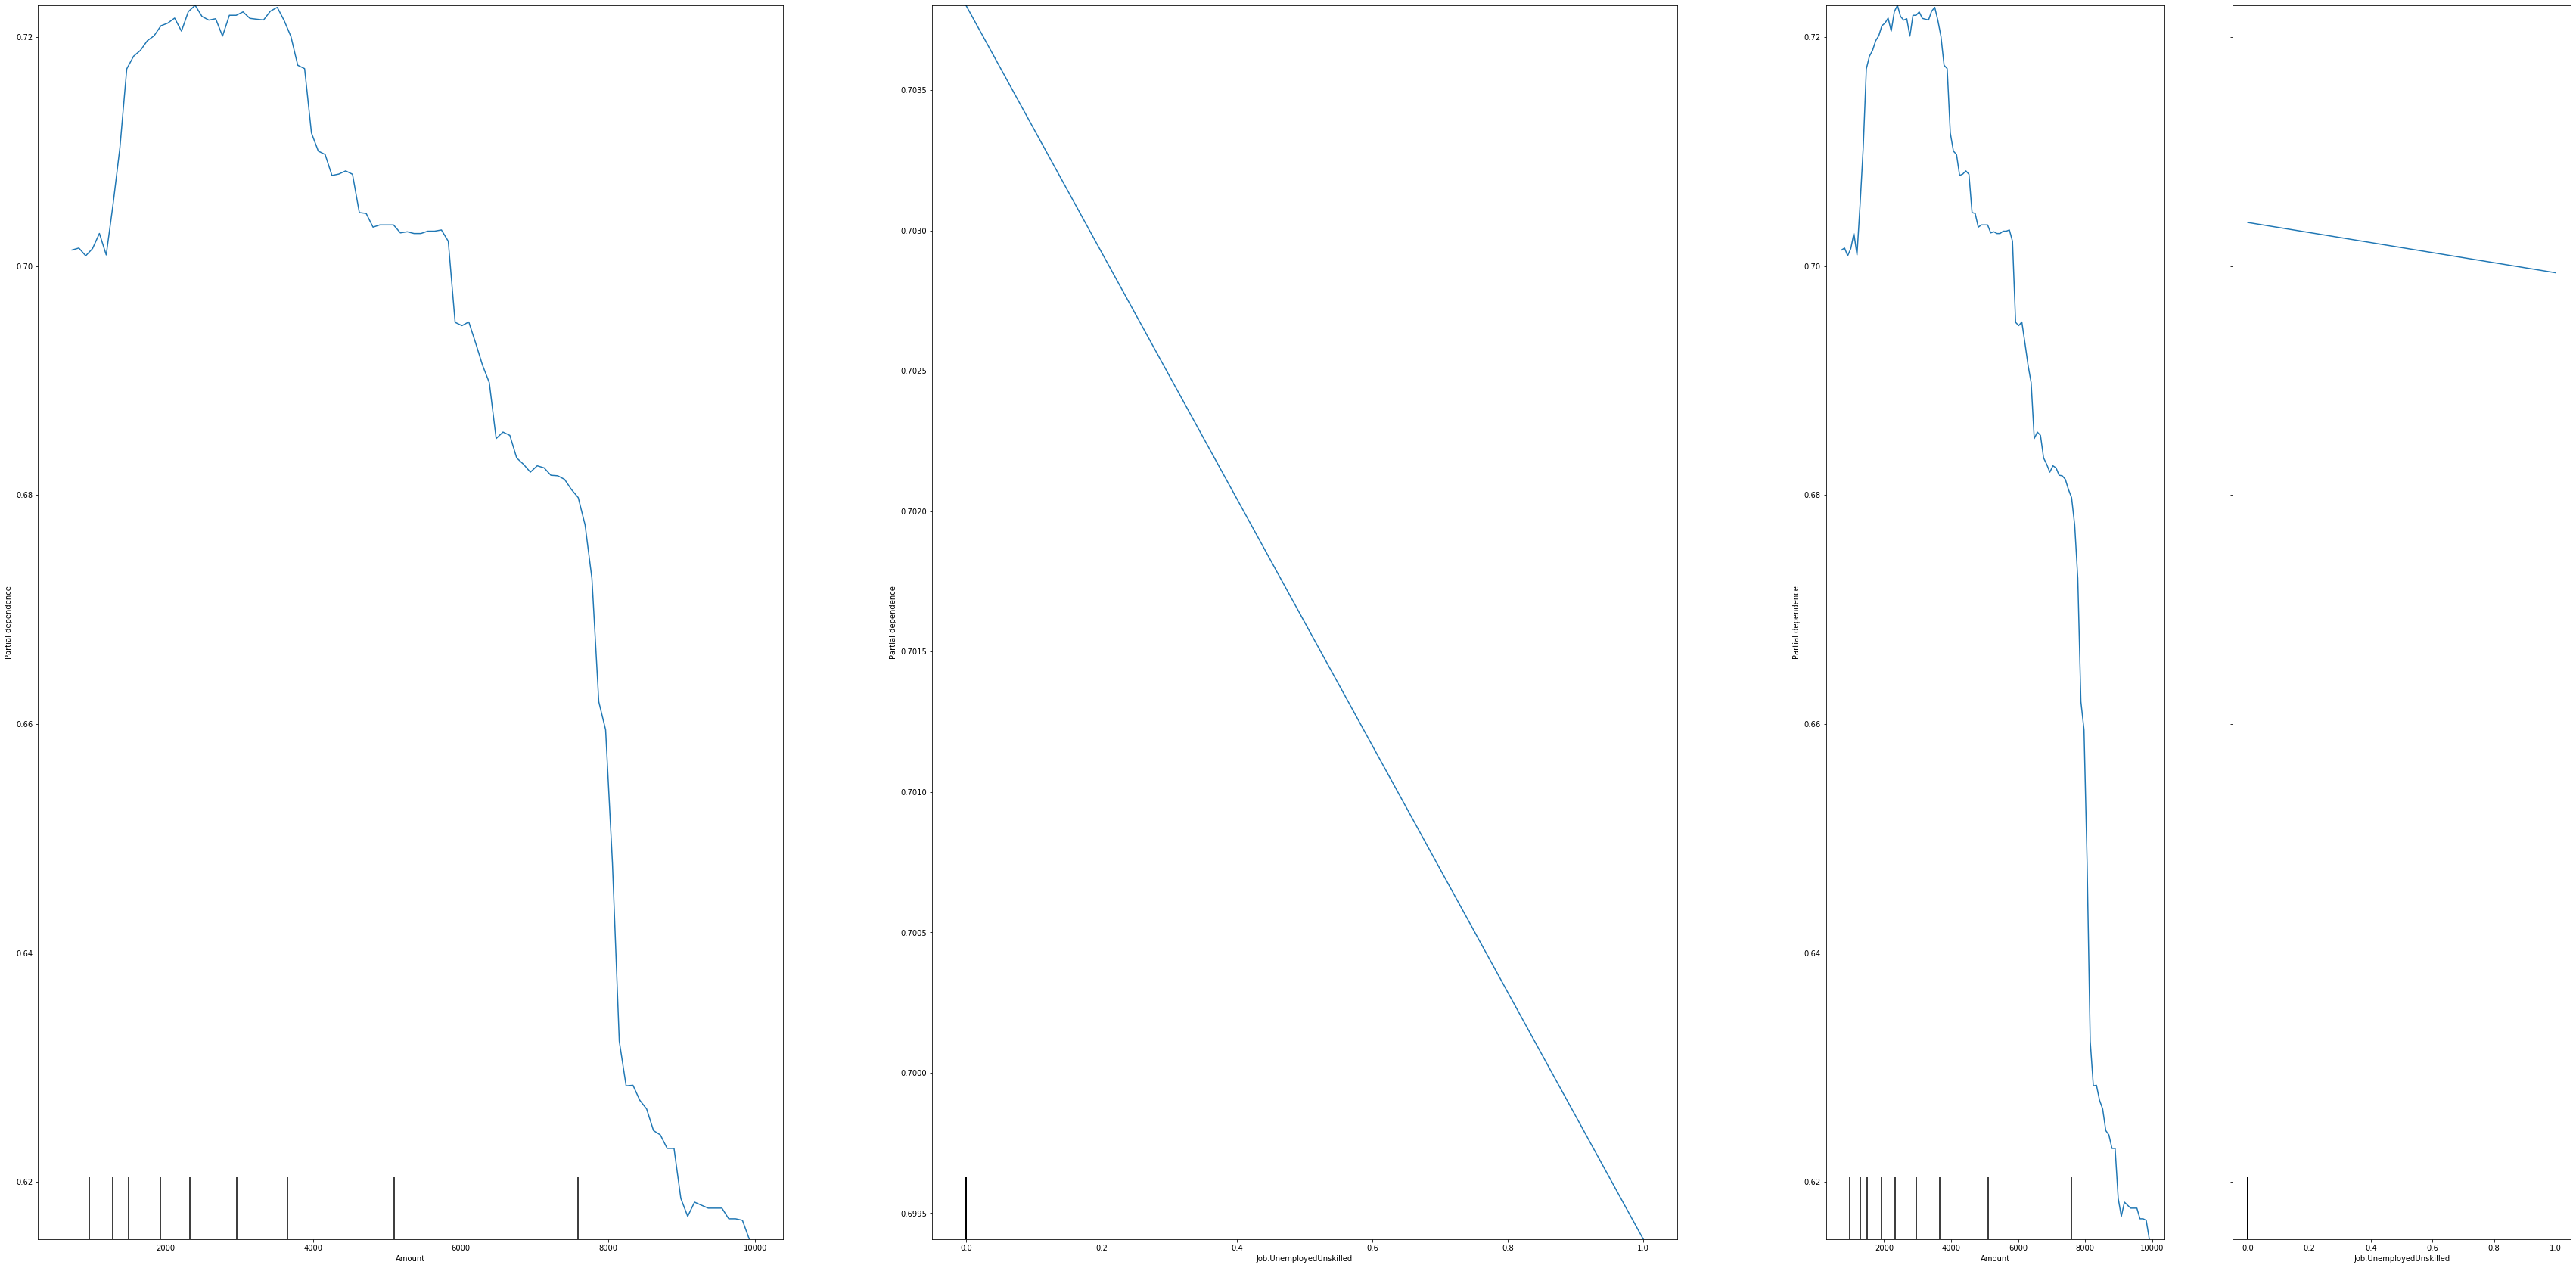

In [211]:
#Computing partial dependency plot for feature Amount
plt.figure(figsize=(60,30))
axr1c1 = plt.subplot(1,3,1)
axr1c2 = plt.subplot(1,3,2)
axr1c3 = plt.subplot(1,3,3)
plot_partial_dependence(gtrf_cv.best_estimator_, X_train, ["Amount"], ax=axr1c1)
plot_partial_dependence(gtrf_cv.best_estimator_, X_train, ["Job.UnemployedUnskilled"], ax=axr1c2)
plot_partial_dependence(gtrf_cv.best_estimator_, X_train, ["Amount", "Job.UnemployedUnskilled"], ax=axr1c3)

## (Optional) Advanced Boosting-Based Algorithms

As explained in the video lectures, the next generation of algorithms after Random Forests (that use Bagging, a.k.a. Bootstrap Aggregation) were developed using Boosting, and the first one of these were Gradient Boosted Machines, which are implemented in scikit-learn (http://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boosting).

Still, in recent years, a number of variations on GBMs have been developed by different research amd industry groups, all of them bringing improvements, both in speed, accuracy and functionality to the original Gradient Boosting algorithms.

In no order of preference, these are:
1. **XGBoost**: https://xgboost.readthedocs.io/en/latest/
2. **CatBoost**: https://tech.yandex.com/catboost/
3. **LightGBM**: https://lightgbm.readthedocs.io/en/latest/

If you're using the Anaconda distribution, these are all very easy to install:

In [ ]:
! conda install -c anaconda py-xgboost

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/springboard

  added / updated specs:
    - py-xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _py-xgboost-mutex-2.0      |            cpu_0           9 KB  anaconda
    blas-1.0                   |              mkl           6 KB  anaconda
    ca-certificates-2020.10.14 |                0         128 KB  anaconda
    certifi-2020.6.20          |           py37_0         159 KB  anaconda
    conda-4.9.0                |           py37_0         3.1 MB  anaconda
    joblib-0.17.0              |             py_0         205 KB  anaconda
    libgfortran-ng-7.3.0       |       hdf63c60_0         1.3 MB  anaconda
    libxgboost-0.90            |       he6710b0_1         3.8 MB  anaconda
    mkl_fft-1.2.0              |   py37h23d657b_0         164 KB  anaconda
    mkl_random-1.0.4           |   py

In [ ]:
! conda install -c conda-forge catboost

In [ ]:
! conda install -c conda-forge lightgbm

Your task in this optional section of the mini project is to read the documentation of these three libraries, and apply all of them to the "German Credit" dataset, just like you did in the case of Decision Trees and Random Forests.

The final deliverable of this section should be a table (can be a pandas DataFrame) which shows the accuracy of all the five algorthms taught in this mini project in one place.

Happy modeling! :)

In [9]:
import xgboost as xgb
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

In [54]:
%%time
# XGBoost 
params_xg = {"learning_rate":[0.3, 0.2,0.1, 0.0001], "n_estimators": np.arange(100, 110,1) }
xgb_class = xgb.XGBClassifier(booster="gbtree", n_jobs=4, random_state=42);
gtxg_cv = GridSearchCV(xgb_class , param_grid=params_xg, cv=10)
gtxg_cv.fit(X_train, y_train)

CPU times: user 1min 18s, sys: 1.01 s, total: 1min 19s
Wall time: 19.8 s


GridSearchCV(cv=10, estimator=XGBClassifier(n_jobs=4, random_state=42),
             param_grid={'learning_rate': [0.3, 0.2, 0.1, 0.0001],
                         'n_estimators': array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109])})

In [47]:
gtxg_cv.best_params_

{'learning_rate': 0.1, 'n_estimators': 100}

In [48]:
y_pred_xg = gtxg_cv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred_xg))

              precision    recall  f1-score   support

         Bad       0.70      0.42      0.52        91
        Good       0.78      0.92      0.85       209

    accuracy                           0.77       300
   macro avg       0.74      0.67      0.69       300
weighted avg       0.76      0.77      0.75       300



In [81]:
%%time
# Catboost
params_cat = {"learning_rate":[0.3, 0.2,0.1, 0.0001], "iterations": np.arange(100, 110,1) }
cat_class = CatBoostClassifier(verbose=0,random_state=42);
gtcat_cv = GridSearchCV(cat_class, param_grid=params_cat, cv=10)
gtcat_cv.fit(X_train, y_train)

CPU times: user 6min 24s, sys: 35.6 s, total: 7min
Wall time: 1min 14s


GridSearchCV(cv=10,
             estimator=<catboost.core.CatBoostClassifier object at 0x7f97207dbad0>,
             param_grid={'iterations': array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109]),
                         'learning_rate': [0.3, 0.2, 0.1, 0.0001]})

In [80]:
y_pred_cat = gtcat_cv.best_estimator_.predict(X_test, verbose=0)

<BarContainer object of 61 artists>

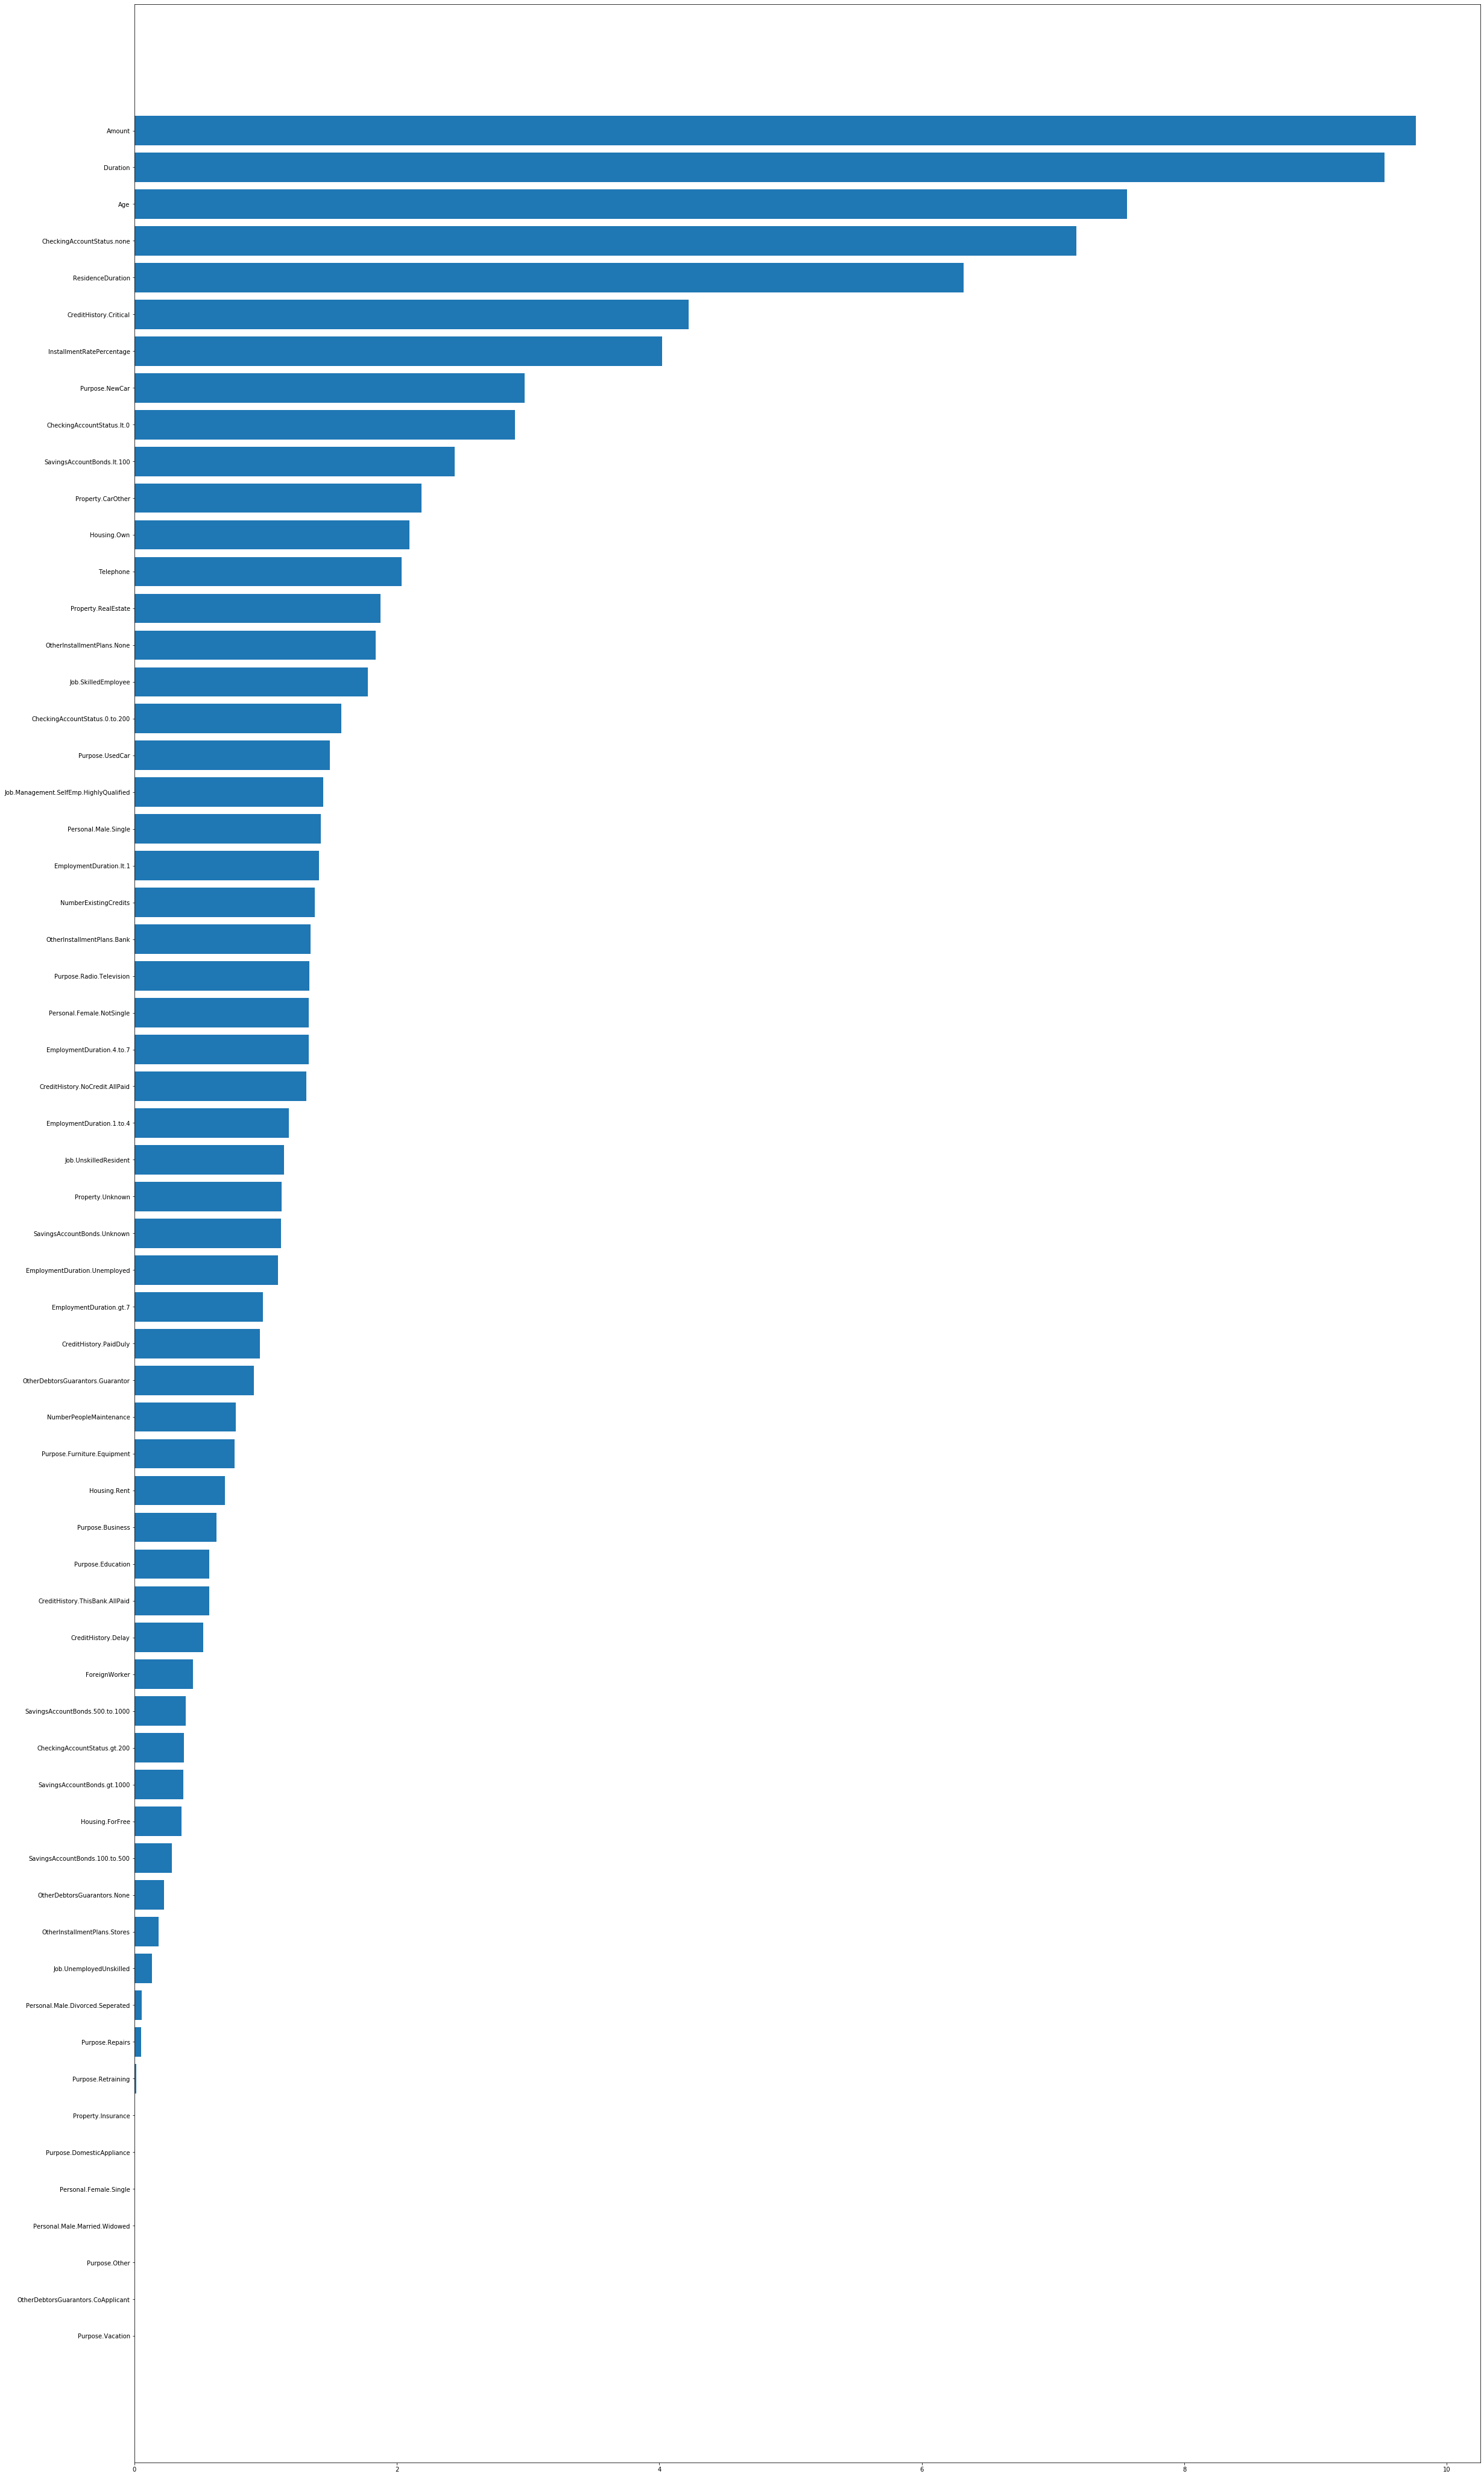

In [173]:
#display feature importance
import matplotlib.pyplot as plt
plt.figure(figsize=(40,75))

dfrf_importantfeatures = pd.DataFrame({"Feature": X.columns, "Importance": gtcat_cv.best_estimator_.feature_importances_})
dfrf_importantfeatures = dfrf_importantfeatures.sort_values(["Importance"]);
plt.barh(dfrf_importantfeatures.Feature, dfrf_importantfeatures.Importance)#gtcat_cv.best_estimator_.feature_importances_)


In [96]:
print(classification_report(y_test, y_pred_cat))

              precision    recall  f1-score   support

         Bad       0.69      0.41      0.51        91
        Good       0.78      0.92      0.84       209

    accuracy                           0.76       300
   macro avg       0.73      0.66      0.68       300
weighted avg       0.75      0.76      0.74       300



In [99]:
%%time
gtlgbm_classifier = LGBMClassifier(boosting_type='gbdt',random_state=42)
params_lgbm = {"learning_rate":[0.3, 0.2,0.1, 0.0001], "n_estimators": np.arange(100, 110,1) }
gtlgbm_cv = GridSearchCV(gtlgbm_classifier, param_grid=params_lgbm, cv=10)
gtlgbm_cv.fit(X_train, y_train)

CPU times: user 1min 46s, sys: 1.52 s, total: 1min 48s
Wall time: 27.2 s


GridSearchCV(cv=10, estimator=LGBMClassifier(random_state=42),
             param_grid={'learning_rate': [0.3, 0.2, 0.1, 0.0001],
                         'n_estimators': array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109])})

In [101]:
y_pred_lgbm = gtlgbm_cv.best_estimator_.predict(X_test, verbose=0)
print(classification_report(y_test, y_pred_lgbm))

              precision    recall  f1-score   support

         Bad       0.70      0.52      0.59        91
        Good       0.81      0.90      0.86       209

    accuracy                           0.79       300
   macro avg       0.76      0.71      0.73       300
weighted avg       0.78      0.79      0.78       300



In [ ]:
#y_pred is for a decision tree
y_pred_rf = gtrf_cv.predict(X_test)  # random forest
y_pred_xg = gtxg_cv.predict(X_test)  # xg_boost
y_pred_cat = gtcat_cv.predict(X_test)  # cat_boost
y_pred_lgbm = gtlgbm_cv.predict(X_test)  # lightgbm

           Model      Test     Train
4           LGBM  0.786667  0.731429
2            XGB  0.770000  0.751429
3       CatBoost  0.763333  0.751429
1  Random Forest  0.740000  0.758571
0       Decision  0.716667  0.751429


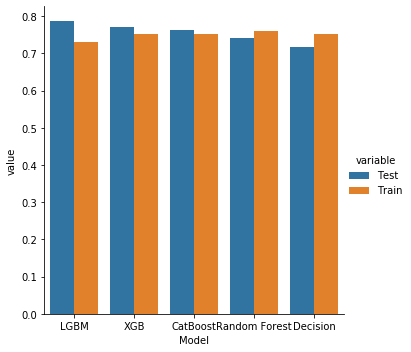

In [189]:
import seaborn as sbs
from sklearn.metrics import accuracy_score as ac
rptDf = pd.DataFrame( data ={"Model": ["Decision", "Random Forest", "XGB", "CatBoost", "LGBM"]
                             , "Test": [ac(y_test,y_pred) ,ac(y_test,y_pred_rf),ac(y_test,y_pred_xg),ac(y_test,y_pred_cat),ac(y_test,y_pred_lgbm)]
                             , "Train":[g_dtc.best_score_,gtrf_cv.best_score_,gtxg_cv.best_score_,gtcat_cv.best_score_,gtlgbm_cv.best_score_] })
rptDf = rptDf.sort_values(["Test"], ascending=False)
print(rptDf)

rptDf1 = rptDf.melt(id_vars="Model")
rptDf1

sbs.catplot(x="Model", y="value", hue="variable", data=rptDf1,kind='bar')
